In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Attribute information:

From <https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names>:

Given is the attribute name, attribute type, the measurement unit and a
brief description.  The number of rings is the value to predict: either
as a continuous value or as a classification problem.

```
Name		    Data Type	Meas.	Description
----		    ---------	-----	-----------
Sex		        nominal			    M, F, and I (infant)
Length		    continuous	mm	    Longest shell measurement
Diameter	    continuous	mm	    perpendicular to length
Height		    continuous	mm	    with meat in shell
Whole weight	continuous	grams	whole abalone
Shucked weight	continuous	grams	weight of meat
Viscera weight	continuous	grams	gut weight (after bleeding)
Shell weight	continuous	grams	after being dried
Rings		    integer			    +1.5 gives the age in years
```

In [25]:
abalone_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

columns = (['Sex','Length','Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weigth', 'Shell weigth', 'Rings'])

abalone = pd.read_csv(abalone_url, header=None, names=columns)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigth,Shell weigth,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [26]:
ab_by_sex = abalone.groupby(by='Sex').agg('count')
ab_by_sex

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigth,Shell weigth,Rings
Sex,,,,,,,,
F,1307,1307,1307,1307,1307,1307,1307,1307
I,1342,1342,1342,1342,1342,1342,1342,1342
M,1528,1528,1528,1528,1528,1528,1528,1528


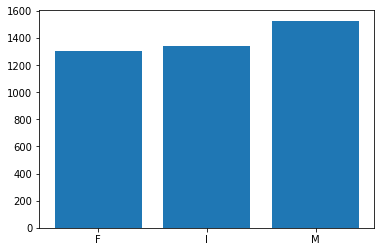

In [29]:
_ = plt.bar(ab_by_sex.index, ab_by_sex['Rings'])

In [52]:
def plot_single_var_distribution(att_name):
    plt.figure(att_name)
    plt.subplot(1, 2, 1)
    plt.boxplot(abalone[att_name], vert=False)
    plt.subplot(1, 2, 2)
    plt.hist(abalone[att_name])

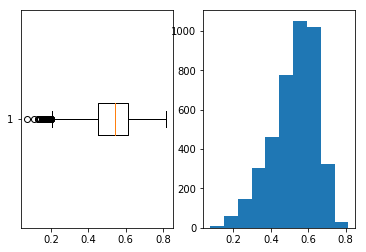

In [53]:
plot_single_var_distribution('Length')

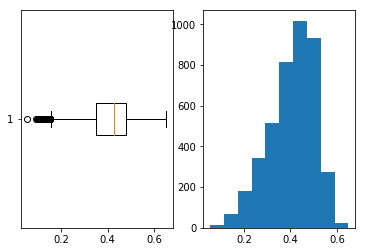

In [34]:
plot_single_var_distribution('Diameter')

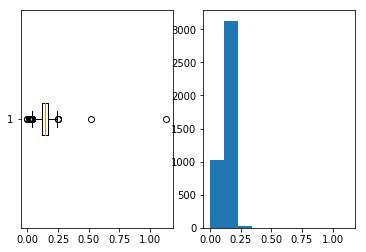

In [35]:
plot_single_var_distribution('Height')

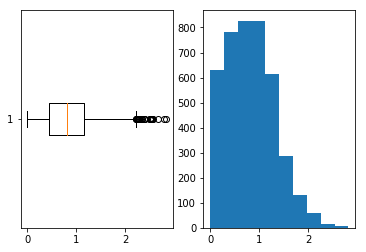

In [36]:
plot_single_var_distribution('Whole weight')

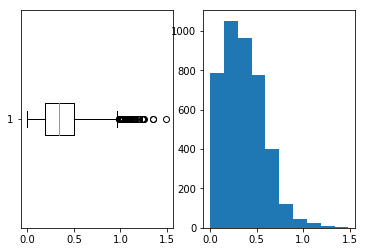

In [37]:
plot_single_var_distribution('Shucked weight')

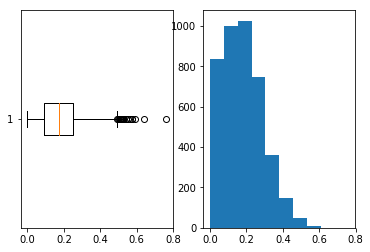

In [39]:
plot_single_var_distribution('Viscera weigth')

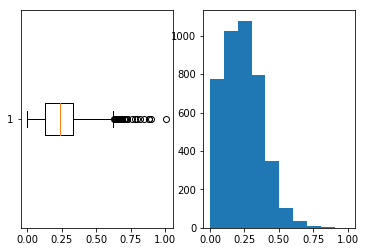

In [40]:
plot_single_var_distribution('Shell weigth')

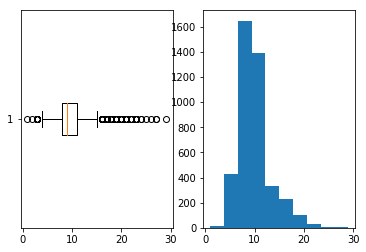

In [41]:
plot_single_var_distribution('Rings')

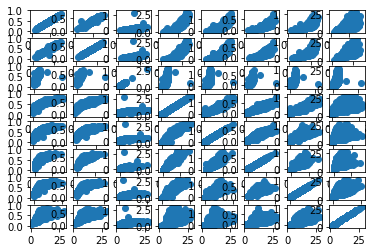

In [48]:
plt.figure('Correlation')

measures = abalone.columns.drop('Sex').tolist()

i = 1
n = len(measures)
for m1 in measures:
    for m2 in measures:
        plt.subplot(n, n, i)
        plt.scatter(abalone[m1], abalone[m2])
        i = i + 1